In [85]:
#Load the dataset
import pandas as pd

df = pd.read_csv('final_dataset_basicmlmodel.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [86]:
for index, tweet in enumerate(df['tweet'][:5]):
    print(index+1, '.', tweet)

1 .  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
2 . @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
3 .   bihday your majesty
4 . #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
5 .  factsguide: society now    #motivation


In [87]:
import re

In [88]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\']',' ',text)
    text = re.sub(r'[^\x00-\x7F]+','',text)
    text = text.lower()
    return text

In [89]:
df['Clean_text'] = df.tweet.apply(lambda x: clean_text(x))

In [90]:
df.head()

,id,label,tweet,Clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [91]:
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

In [92]:
def gen_feq(text):
    word_list = []
    for two_words in text.split():
        word_list.extend(two_words)
    word_feq = pd.Series(word_list).value_counts()
    word_feq = word_feq.drop(STOP_WORDS, errors = 'ignore')
    return word_feq

In [93]:
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't",word):
            return 1
        else:
            return 0

In [94]:
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

In [95]:
def is_question(words):
    for word in words:
        if word in['when','what','how','why','who']:
            return 1
        else:
            return 0
    

In [96]:
word_feq = gen_feq(df.Clean_text.str)
#100 most rare words in the dataset
rare_100 = word_feq[-100:]
#Number of words in a tweet
df['word_count'] = df.Clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
df['any_neg'] = df.Clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
df['is_question'] = df.Clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
df['any_rare'] = df.Clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
df['char_count'] = df.Clean_text.apply(lambda x: len(x))

In [97]:
gen_feq(df.Clean_text.str)[:10]

user      3351
amp        439
love       320
day        254
trump      214
happy      207
will       191
people     186
new        171
u          158
dtype: int64

In [98]:
df.head()

,id,label,tweet,Clean_text,word_count,any_neg,is_question,any_rare,char_count
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,18,0,0,0,102
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...,19,0,0,0,122
2,3,0,bihday your majesty,bihday your majesty,3,0,0,0,21
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,12,0,0,0,86
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,0,0,0,39


<function matplotlib.pyplot.show(close=None, block=None)>

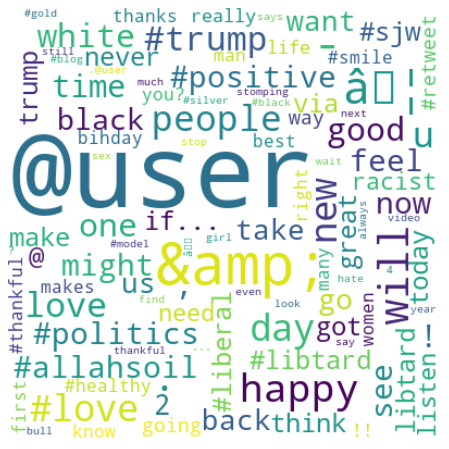

In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as w
word_freq = gen_feq(df.tweet.str)
wc = w(width = 400, height = 400, max_words = 100, background_color = 'white').generate_from_frequencies(word_freq) 
plt.figure(figsize=(20,8))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show

In [100]:
from sklearn.model_selection import train_test_split

X = df[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question']]
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [101]:
from sklearn.naive_bayes import GaussianNB

#Initialize GaussianNB classifier
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 59.008579599618685 %


In [103]:
from sklearn.tree import DecisionTreeClassifier
#Initialize GaussianNB classifier
model = DecisionTreeClassifier(criterion = 'gini')
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 63.67969494756911 %
